## Problema: avaliar dados de óbitos por SRAG nos anos 2019 e 2020. V1.

#### Os dados analisados estão no formato .CSV na pasta 'Data' do projeto e foram baixados do Portal da Transparência no mês de junho/20.
#### Um arquivo contem os dados consolidados do ano de 2020 até 16/06/20. O outro, dados consolidados do ano de 2019.
#### Ambos arquivos registram mortes em decorrência de problemas respiratórios.

In [1]:
# Importando bibliotecas pyData Open Stack, para trabalhar com análise de dados.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
Realizando a carga dos registros do ano de 2019 para um objeto DataFrame do pandas.
Atenção para o caminho onde estão os arquivos!
''' 
dados_2019 = pd.read_csv('../Data/obitos-2019.csv')

In [3]:
# Imprimindo cabeçalho do DataFrame dataOrigin19
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,28
3,AC,OUTRAS,HOSPITAL,< 9,M,56
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [4]:
# Realizando a carga dos registros do ano de 2020 para um objeto DataFrame do pandas.
dados_2020 = pd.read_csv('../Data/obitos-2020.csv')

In [5]:
# Imprimindo cabeçalho do DataFrame dataOrigin20
dados_2020.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,3
1,AC,OUTRAS,DOMICILIO,< 9,M,3
2,AC,OUTRAS,HOSPITAL,< 9,F,20
3,AC,OUTRAS,HOSPITAL,< 9,M,20
4,AC,OUTRAS,OUTRO,< 9,F,3


In [6]:
# Carregagando em um novo objeto DataFrame, o total por tipo de doença no ano de 2019.
obitos_srag_2019 = pd.DataFrame(dados_2019.groupby('tipo_doenca').sum())

In [7]:
# Carregagando em um novo objeto DataFrame, o total por tipo de doença no ano de 2020.
obitos_srag_2020 = pd.DataFrame(dados_2020.groupby('tipo_doenca').sum())

In [8]:
# Imprimindo o resultado.
obitos_srag_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,7705
INSUFICIENCIA_RESPIRATORIA,97041
OUTRAS,634226
PNEUMONIA,219855
SEPTICEMIA,170281
SRAG,1451


In [9]:
# Imprimindo o resultado.
obitos_srag_2020

,total
tipo_doenca,
COVID,39052
INDETERMINADA,4423
INSUFICIENCIA_RESPIRATORIA,42942
OUTRAS,278335
PNEUMONIA,83913
SEPTICEMIA,68841
SRAG,8814


In [12]:
# Realizando merge dos dois DataFrames para apresentar um comparativo entre os anos.
total_obitos_srag = pd.merge(obitos_srag_2019, obitos_srag_2020, on='tipo_doenca')

In [13]:
total_obitos_srag.columns = ['2019', '2020']

In [14]:
'''
Comparando os resultados parciais de 2020, com os resultados de 2019.
Com um rápida análise nos valores podemos notar que até 16/06/20, temos um valor praticamente 
6X maior que o ano inteiro de 2019, nos casos de SRAG (Síndrome Respiratória Aguda Grave).
Em 2019, podemos observar também que tivemos um caso de COVID.
'''
total_obitos_srag

,2019,2020
tipo_doenca,,
COVID,1,39052
INDETERMINADA,7705,4423
INSUFICIENCIA_RESPIRATORIA,97041,42942
OUTRAS,634226,278335
PNEUMONIA,219855,83913
SEPTICEMIA,170281,68841
SRAG,1451,8814


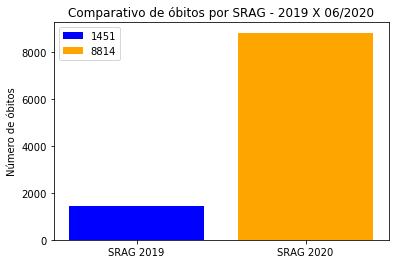

In [17]:
'''
Criando plot para imprimir gráfico comparativo entre óbitos de SRAG 2019 X 06/2020.
Através do gráfico, fica mais evidente o crescimento de óbito por SRAG(Síndrome Respiratória Aguda Grave),
com a pandemia de COVID 19.
'''
srag_19 = total_obitos_srag.loc['SRAG']['2019']
srag_20 = total_obitos_srag.loc['SRAG']['2020']

plt.title('Comparativo de óbitos por SRAG - 2019 X 06/2020')
plt.bar('SRAG 2019', srag_19, label = srag_19, color = 'blue')
plt.bar('SRAG 2020', srag_20, label = srag_20, color = 'orange')
plt.ylabel('Número de óbitos')
plt.legend()
plt.show()